# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [237]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "WeatherPY/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [238]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)







599

In [239]:
#weather_api_key

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [135]:
print("Beginning Data Retrieval\n-----------------------------\n")

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

responses = []
i = 0

for i, city in enumerate(cities, 1):
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        pprint.pprint (f"Processing Record {i}| {city}")
        responses.append(response)
    else:
        pprint.pprint("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n---------------\n")

Beginning Data Retrieval
-----------------------------

'Processing Record 1| puerto ayora'
'Processing Record 2| chapais'
'City not found. Skipping...'
'Processing Record 4| pevek'
'Processing Record 5| cape town'
'Processing Record 6| mataura'
'Processing Record 7| carnarvon'
'City not found. Skipping...'
'Processing Record 9| vaini'
'Processing Record 10| cimarron hills'
'Processing Record 11| rikitea'
'Processing Record 12| umba'
'City not found. Skipping...'
'Processing Record 14| acapulco'
'Processing Record 15| jamestown'
'Processing Record 16| hobart'
'Processing Record 17| hermanus'
'Processing Record 18| coihaique'
'Processing Record 19| muravlenko'
'Processing Record 20| busselton'
'Processing Record 21| pemberton'
'Processing Record 22| kapaa'
'Processing Record 23| peremyshlyany'
'Processing Record 24| ribeira grande'
'Processing Record 25| katsuura'
'Processing Record 26| port alfred'
'Processing Record 27| bonthe'
'Processing Record 28| buribay'
'Processing Record 29| ne

In [138]:

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

responses = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        pprint.pprint(response)
       # print(response['wind']['speed'])
    except:
        pprint.print(response)
        #print('error')

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -0.74, 'lon': -90.35},
 'dt': 1595361007,
 'id': 3652764,
 'main': {'feels_like': 20.42,
          'humidity': 61,
          'pressure': 1011,
          'temp': 23.61,
          'temp_max': 26,
          'temp_min': 22.22},
 'name': 'Puerto Ayora',
 'sys': {'country': 'EC',
         'id': 8521,
         'sunrise': 1595333112,
         'sunset': 1595376606,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 7.2}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 49.78, 'lon': -74.85},
 'dt': 1595361057,
 'id': 5919850,
 'main': {'feels_like': 17.44,
          'humidity': 49,
          'pressure': 1015,
          'temp': 21,
          'temp_max': 21,
          'temp_min': 21},
 'name': 'Chapais',
 'sys': {'countr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [140]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_names = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

for city in cities[]:
    
    try:
        response = requests.get(query_url + city).json()   
        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print("City not found. Skipping.")

city_data_dict = {
    'City': city_names,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date,
}


city_data_df = pd.DataFrame(city_data_dict)

city_data_df.to_csv(output_data_file, index=False)

city_data_df.head()

City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not fou

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,26.00,61,75,7.20,EC,1595360994
1,Chapais,49.78,-74.85,21.00,49,20,5.10,CA,1595361266
2,Pevek,69.70,170.31,9.70,59,100,2.10,RU,1595361266
3,Cape Town,-33.93,18.42,13.33,93,0,1.50,ZA,1595361261
4,Mataura,-46.19,168.86,3.89,83,93,1.34,NZ,1595361053


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [196]:
city_data_df[city_data_df.Humidity >= 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,Carnarvon,-24.87,113.63,15.00,100,0,4.10,AU,1595361054
33,Mount Gambier,-37.83,140.77,8.00,100,90,2.10,AU,1595361004
161,George Town,5.41,100.34,26.00,100,40,2.10,MY,1595361112
277,George Town,5.41,100.34,26.00,100,40,2.10,MY,1595361309
291,Berlevåg,70.86,29.09,13.00,100,40,4.10,NO,1595361093
296,Clarence Town,-32.58,151.78,8.33,100,1,2.60,AU,1595361311
349,Øksfjord,70.24,22.35,11.67,100,75,5.10,NO,1595361324
494,Nelson Bay,-32.72,152.15,8.33,100,10,2.60,AU,1595361096
520,Labuan,5.28,115.24,26.00,100,20,2.55,MY,1595361354
524,Alofi,-19.06,-169.92,23.00,100,91,2.10,NU,1595361355


In [202]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data_df = city_data_df[(city_data_df["Humidity"] > 100)].index

dirty_city_data_df

Int64Index([], dtype='int64')

In [197]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
dirty_city_data_df = pd.DataFrame(city_data_dict)

dirty_city_data_df.to_csv(output_data_file, index=False)

dirty_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,26.00,61,75,7.20,EC,1595360994
1,Chapais,49.78,-74.85,21.00,49,20,5.10,CA,1595361266
2,Pevek,69.70,170.31,9.70,59,100,2.10,RU,1595361266
3,Cape Town,-33.93,18.42,13.33,93,0,1.50,ZA,1595361261
4,Mataura,-46.19,168.86,3.89,83,93,1.34,NZ,1595361053


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

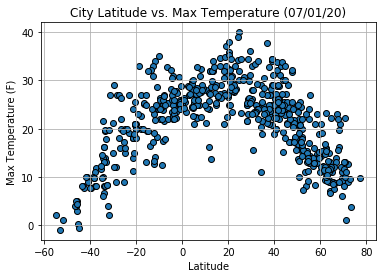

In [222]:
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature (07/01/20)')
plt.savefig('WeatherPY/output_data/CityLatitudeVsMaxTemp.png')

In [ ]:
#This bell curve suggests a normal distribution of temperature. The plot shows that temperture is highest in the Southern Hemiphere but also high around the world. In the summer month of July we typically see warmersconditions throughout the equator .  



## Latitude vs. Humidity Plot

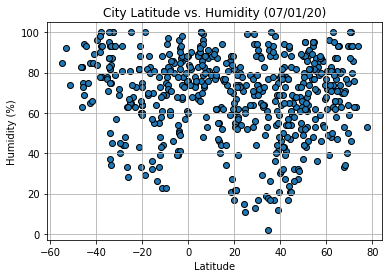

In [223]:
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (07/01/20)')
plt.savefig('WeatherPY/output_data/CityLatitudeVsHumidity.png')

In [ ]:
#This indicates that humidity is highest in the Northern Hemisphere and dropping in the Southern Hemisphere.

## Latitude vs. Cloudiness Plot

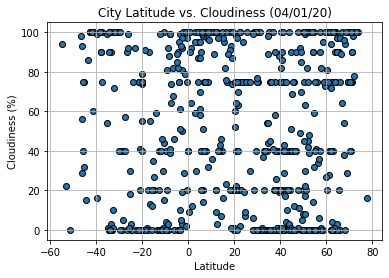

In [205]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.savefig('WeatherPY/output_data/CityLatitudeVsCloudiness.png')

In [ ]:
#cloudiness is not very present at this time of the year. The clouds are strategically very saturated on the far extremes and on horizontal lines. Cloudiness may be lower in Northern Hemisphere but not very different from the Southern Hemisphere.

## Latitude vs. Wind Speed Plot

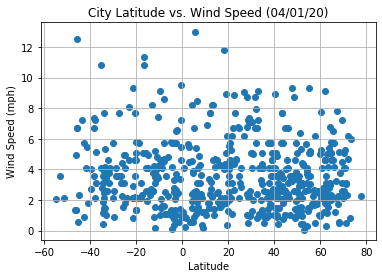

In [206]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('WeatherPY/output_data/CityLatitudeVsWindSpeed.png')

# Show plot
plt.show()

In [ ]:
#wind tends to be very present,fastest and higher futher away from the equator.

## Linear Regression

In [207]:
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [208]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] > 0, :]
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7111437277263516


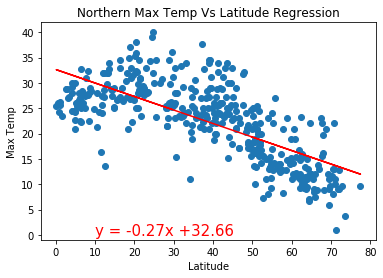

In [226]:
linear_reg_plot(northern_hemisphere_df,
                'Northern Max Temp Vs Latitude Regression',
                'Max Temp',
                'Max Temp',
                'WeatherPY/output_data/NorthernMaxTempVsLatitudeReg.png',
                (10,0))

In [ ]:
#This scatter plot of linear regression indicates that max temperture stays very constant as the latitude goes further away from the equator becuase of the hot seasonthe entire world is facing.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8057665872409167


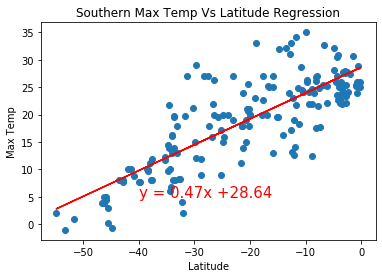

In [229]:
linear_reg_plot(southern_hemisphere_df, 'Southern Max Temp Vs Latitude Regression', 
                                        'Max Temp', 
                                        'Max Temp',
                                        'WeatherPY/output_data/SouthernMaxTempVsLatitudeReg.png', 
                                        (-40,5)) 

In [ ]:
# r-squared is not extremly strong in the data set. This scatter plot of linear regression indicates max temp decreses as latitude goes futher away from the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.021057204971570237


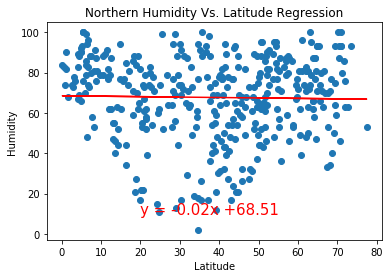

In [233]:
linear_reg_plot(northern_hemisphere_df, 'Northern Humidity Vs. Latitude Regression', 
                                        'Humidity', 
                                        'Humidity', 
                                        'WeatherPy/output_data/NorthernHumidityVsLatitudeReg.png',
                                        (20,10)) 

In [ ]:
# r -squared is negative making it difficult too determine if this accurate. Humdity decreases the father away the latitude is from the equator. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.18874417266578367


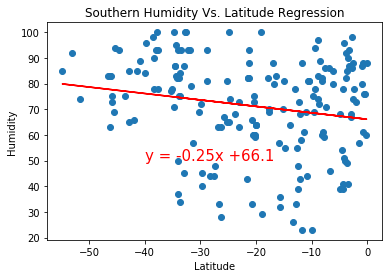

In [234]:
linear_reg_plot(southern_hemisphere_df, 'Southern Humidity Vs. Latitude Regression', 
                                        'Humidity',
                                        'Humidity', 
                                        'WeatherPy/output_data/SouthernHumidityVsLatitudeReg.png', 
                                        (-40,50)) 

In [ ]:
#negative r-squared makes it difficult to determine if this is accurate. Humidity seems to increase closer to the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.07126132423256963


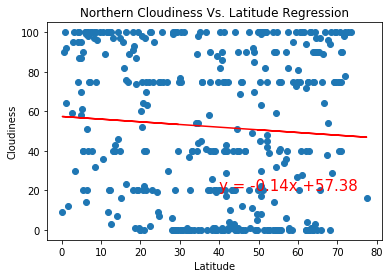

In [236]:
linear_reg_plot(northern_hemisphere_df, 'Northern Cloudiness Vs. Latitude Regression', 
                                        'Cloudiness', 
                                        'Cloudiness', 
                                        'WeatherPy/output_data/NorthernCloudinessVsLatitudeReg.png', 
                                        (40,20)) 

In [ ]:
#at this time of the year we are seeing an increase clouds moving away from the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08477570743680098


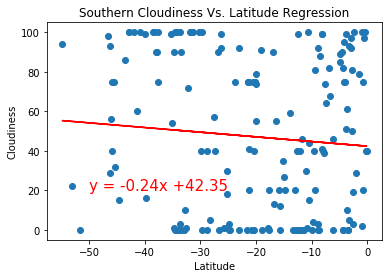

In [214]:
linear_reg_plot(southern_hemisphere_df, 'Southern Cloudiness Vs. Latitude Regression',
                                        'Cloudiness',
                                        'Cloudiness', 
                                        'WeatherPy/output_data/SouthernCloudinessVsLatitudeReg.png', 
                                        (-50,20)) 

In [ ]:
#at this time of the year we are seeing a decrease in clouds as we move away from the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0347680780922303


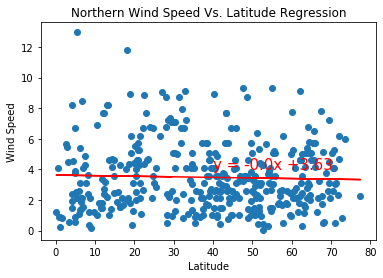

In [218]:
linear_reg_plot(northern_hemisphere_df, 'Northern Wind Speed Vs. Latitude Regression', 
                                        'Wind Speed', 
                                        'Wind Speed', 
                                        'WeatherPy/output_data/NorthernWindSpeedVsLatitudeReg.png',
                                        
                (40,4)) 

In [ ]:
#wind speed may increase the further we are from the equator but unlikely due to negative r-squared,

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.06159052151840764


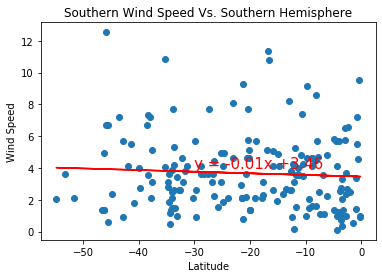

In [217]:
linear_reg_plot(southern_hemisphere_df, 'Southern Wind Speed Vs. Southern Hemisphere', 
                                        'Wind Speed', 
                                        'Wind Speed',
                                        'WeatherPY/output_data/SouthernWindSpeedVsLatitudeReg.png', 
                                        (-30,4)) 

In [ ]:
#this plot is very similar to the Northern Hemisphere and suggests that wind speed slighlty increases the futher are from the equator.